## Utilizando o pacote HydroBr

### Vamos baixar dados de uma estação da ANA utilizando Python?

In [50]:
###Importando as Bibliotecas
import hydrobr
import pandas as pd
import geopandas as gpd

from matplotlib import pyplot 
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import plot
from PIL import Image

In [4]:
###Abrindo dados das estações - Nesta caso vamos trabalhar com dados de precipitação
lista_estacaoes = hydrobr.get_data.ANA.list_prec_stations()
lista_estacaoes.head()

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958/01/01,1964/12/31,7,25.0,0,100.0
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977/12/09,2019/08/31,43,3.5,35,18.6
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981/07/01,2019/07/31,39,2.4,29,25.6
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982/02/18,2019/08/31,38,0.0,35,7.9
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989/08/21,2019/07/31,31,5.0,20,35.5


In [10]:
##Filtrando por Cidade
lista_estacaoes_city = lista_estacaoes[lista_estacaoes.City=='PORTO ALEGRE']
lista_estacaoes_city

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
11693,PORTO ALEGRE,03051011,2,87,PORTO ALEGRE,RIO GRANDE DO SUL,INMET,-30.0536,-51.1733,1961/01/01,2019/06/30,59,2.1,52,11.9
11695,PORTO ALEGRE (STA TERESA-839),03051015,2,87,PORTO ALEGRE,RIO GRANDE DO SUL,INMET,-30.0667,-51.2167,1966/11/01,1970/12/31,5,11.4,2,60.0
11704,PORTO ALEGRE - CPRM,03051043,2,87,PORTO ALEGRE,RIO GRANDE DO SUL,ANA,-30.0722,-51.2281,2011/11/03,2019/10/31,9,20.4,0,100.0
11705,ARROIO DO SALSO,03051045,2,87,PORTO ALEGRE,RIO GRANDE DO SUL,ANA,-30.1692,-51.0739,2013/12/24,2019/09/30,7,2.9,4,42.9


In [11]:
#Obtendo o código das primeiras cinco estações como uma lista
codigo_estacao = lista_estacaoes_city.Code.to_list() 
codigo_estacao

['03051011', '03051015', '03051043', '03051045']

In [39]:
#Extraindo dados das estações selecionadas
data_stations = hydrobr.get_data.ANA.prec_data(codigo_estacao) 

100%|██████████| 4/4 [01:27<00:00, 21.94s/it]


In [40]:
##Obtendo informações sobre as estações 
data_stations.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22339 entries, 1961-01-01 to 2022-02-28
Freq: D
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   03051011  20920 non-null  float64
 1   03051015  1349 non-null   float64
 2   03051043  2974 non-null   float64
 3   03051045  2839 non-null   float64
dtypes: float64(4)
memory usage: 872.6 KB


In [41]:
###Veridicando a distribuição dos dados no tempo
###O diagrama de Gantt 
gantt_fig = hydrobr.Plot.gantt(data_stations)
gantt_fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    xaxis_title = 'Year',
    yaxis_title = 'Station Code',
    font=dict(family="Courier New, monospace", size=12))

#Para plotar e salvar o gráfico de Gantt como html
plot(gantt_fig,filename='gantt' + '.html')

'gantt.html'

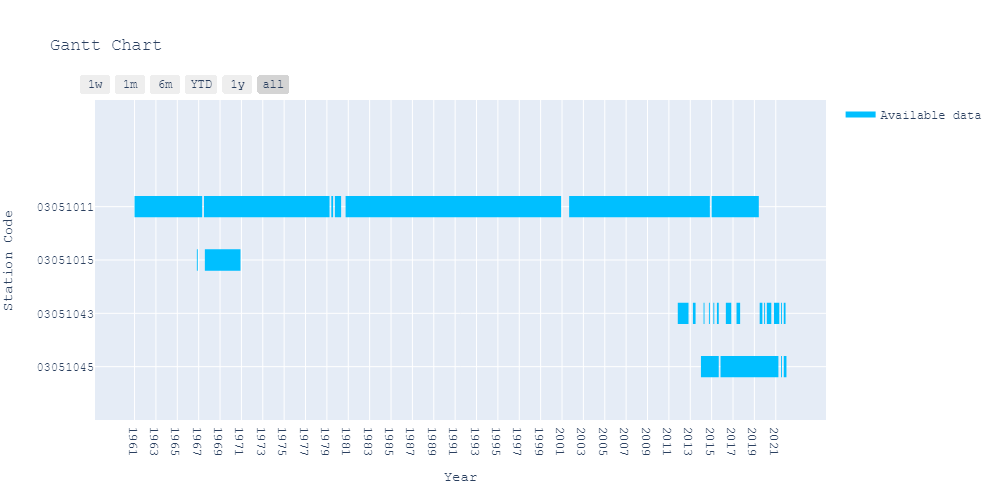

In [42]:
# Visualizando nosso gráfico no código
im = Image.open('C:/Users/Christhian Cunha/Downloads/newplot.png')
im

In [44]:
##Analisando o DF
data_stations_index = data_stations.reset_index()
data_stations_index

,index,03051011,03051015,03051043,03051045
0,1961-01-01,0.4,NaN,NaN,NaN
1,1961-01-02,0.0,NaN,NaN,NaN
2,1961-01-03,0.2,NaN,NaN,NaN
3,1961-01-04,2.4,NaN,NaN,NaN
4,1961-01-05,0.0,NaN,NaN,NaN
...,...,...,...,...,...
22334,2022-02-24,NaN,NaN,0.0,NaN
22335,2022-02-25,NaN,NaN,0.3,NaN
22336,2022-02-26,NaN,NaN,NaN,NaN
22337,2022-02-27,NaN,NaN,NaN,NaN


In [46]:
##Preparando a base de dados para realizar o gráfico
data_stations_melt = pd.melt(data_stations_index, id_vars='index',
                        value_vars=codigo_estacao,   var_name="Estacoes", value_name="Precipitacao")

data_stations_melt

,index,Estacoes,Precipitacao
0,1961-01-01,03051011,0.4
1,1961-01-02,03051011,0.0
2,1961-01-03,03051011,0.2
3,1961-01-04,03051011,2.4
4,1961-01-05,03051011,0.0
...,...,...,...
89351,2022-02-24,03051045,NaN
89352,2022-02-25,03051045,NaN
89353,2022-02-26,03051045,NaN
89354,2022-02-27,03051045,NaN


Text(0, 0.5, 'Precipitação mm/dia')

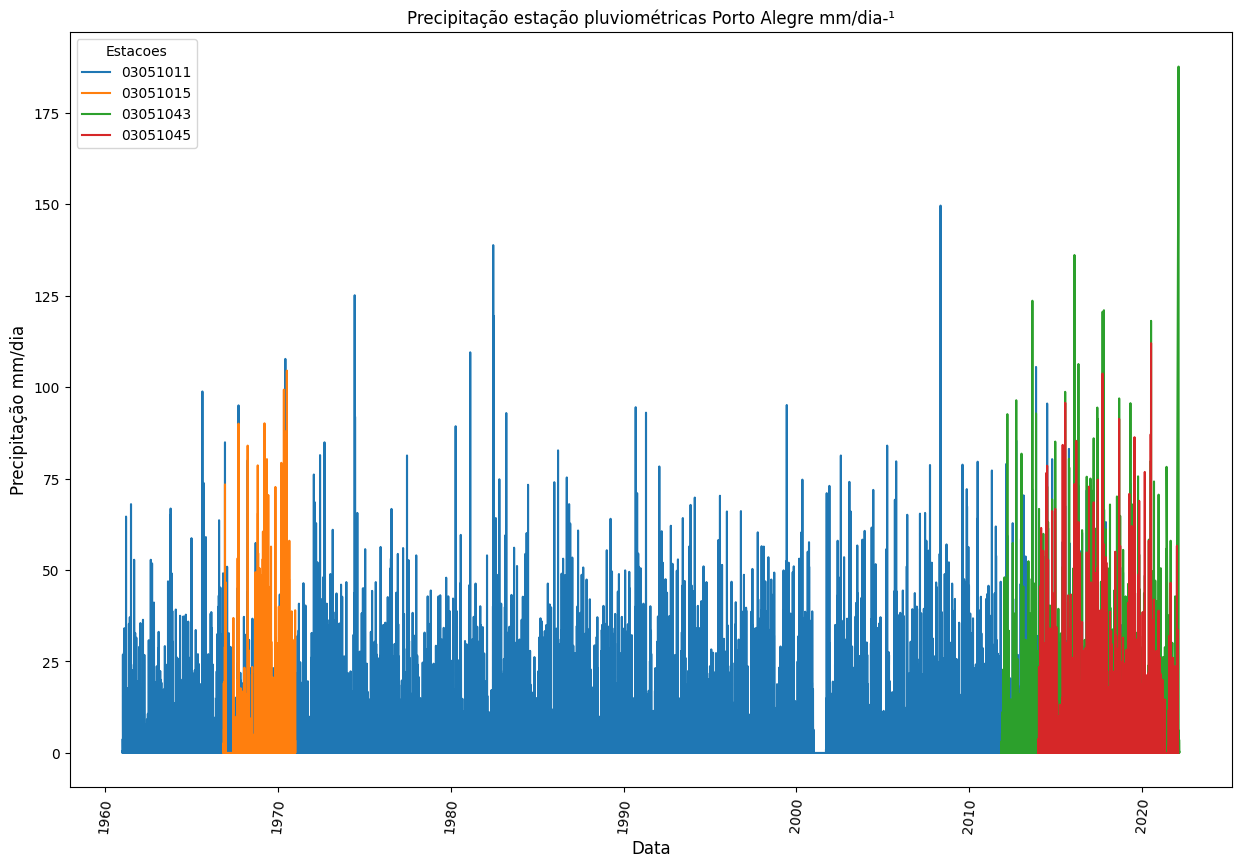

In [55]:
##Plotando os dados como gráficos e observando as séries temporais
##Gráfico série temporal
fig, ax = plt.subplots(1,1,figsize=(15, 10), dpi= 100) 
from matplotlib import rc
rc('mathtext', default='regular')
plt.xticks(fontsize=10, rotation=85)
plt.yticks(fontsize=10)

sns.lineplot(x="index", y="Precipitacao", hue="Estacoes", data=data_stations_melt)\
            .set(title='Precipitação estação pluviométricas Porto Alegre mm/dia-¹')

plt.xlabel('Data', fontsize=12)
plt.ylabel('Precipitação mm/dia', fontsize=12)

##### Referencias
* ###### Adpatado de Carvalho (2020) - https://wallissoncarvalho.github.io/HydroBr/